h:\dev\git\csc730_adbench\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 191   23  383 6131 3065   95  766   11   47 1532]
[7. 1. 8. 5. 0. 2. 6. 9. 4. 3.]
[  11   23   47   95  191  383  766 1532 3065 6131]
(array([0., 1.]), array([9769,   26], dtype=int64))
Class 0.0 has 2441 samples
mean = 0.014748054076198279, std = 0.12054272677007026, min = 0.0, max = 1.0
Class 1.0 has 8 samples
mean = 0.625, std = 0.4841229182759271, min = 0.0, max = 1.0


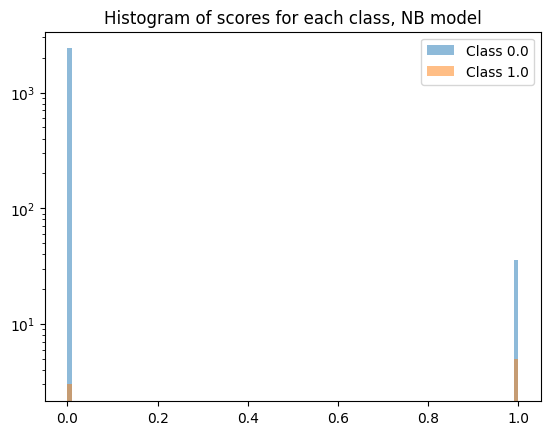

Class 0.0 has 2441 samples
mean = 0.0010386082242476288, std = 0.011550466268207202, min = 6.191473795700574e-07, max = 0.48840046420044225
Class 1.0 has 8 samples
mean = 0.6407676938356495, std = 0.43984733408674936, min = 0.014748785409575605, max = 0.9999988888826746


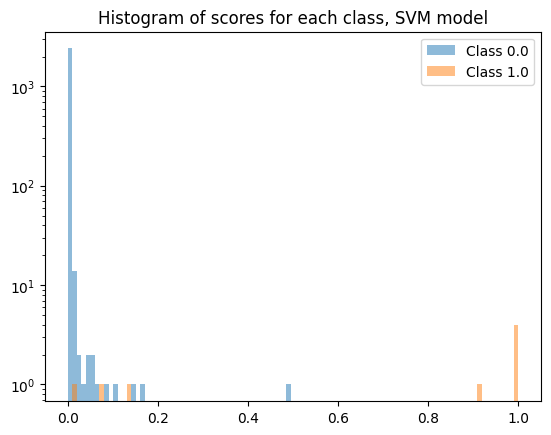

Class 0.0 has 2441 samples
mean = 0.0011368541264359425, std = 0.03262094856143412, min = 0.0, max = 1.0
Class 1.0 has 8 samples
mean = 0.516422380474468, std = 0.48269795056133497, min = 2.0737184875172808e-42, max = 1.0


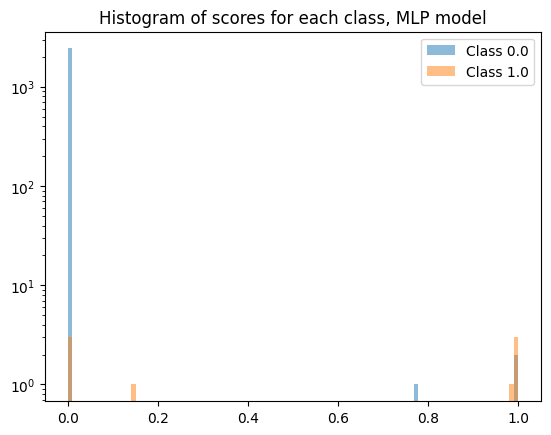

Class 0.0 has 2441 samples
mean = 0.0029332240884883246, std = 0.010903436640439119, min = 0.0, max = 0.18
Class 1.0 has 8 samples
mean = 0.23875, std = 0.1404846521866357, min = 0.06, max = 0.45


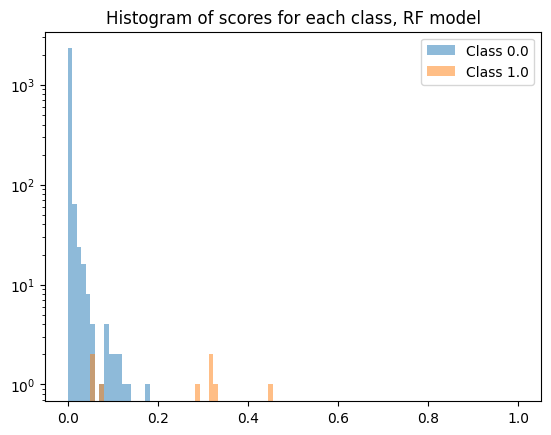

Class 0.0 has 2441 samples
mean = 0.0017554389515075908, std = 0.03996217550717545, min = 2.8855932362665314e-17, max = 0.9999999735112137
Class 1.0 has 8 samples
mean = 0.3943418516817236, std = 0.47163575899916027, min = 3.6705077148307553e-07, max = 0.9999555333436302


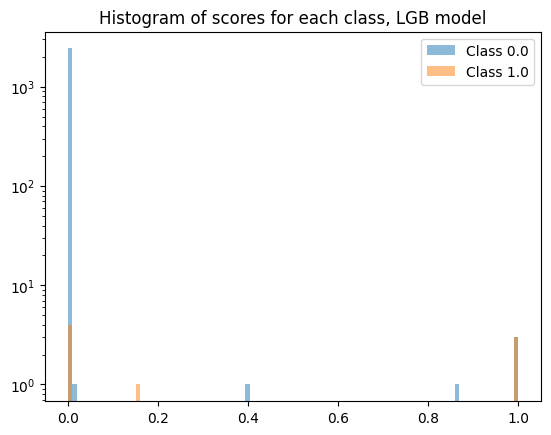

Class 0.0 has 2441 samples
mean = 0.0005090773920528591, std = 0.016850890591740608, min = 4.464945050131064e-06, max = 0.8285849094390869
Class 1.0 has 8 samples
mean = 0.33706244826316833, std = 0.31491851806640625, min = 0.00041455848258920014, max = 0.7886103391647339


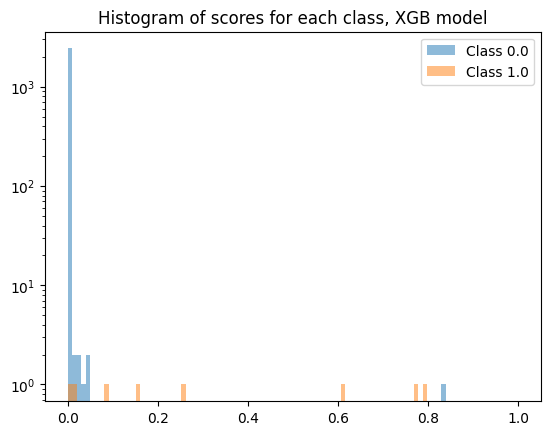

Learning rate set to 0.027296
0:	learn: 0.6131931	total: 209ms	remaining: 3m 28s
1:	learn: 0.5473727	total: 270ms	remaining: 2m 14s
2:	learn: 0.4848673	total: 324ms	remaining: 1m 47s
3:	learn: 0.4260511	total: 375ms	remaining: 1m 33s
4:	learn: 0.3774505	total: 428ms	remaining: 1m 25s
5:	learn: 0.3372683	total: 482ms	remaining: 1m 19s
6:	learn: 0.2972276	total: 535ms	remaining: 1m 15s
7:	learn: 0.2653136	total: 587ms	remaining: 1m 12s
8:	learn: 0.2353424	total: 640ms	remaining: 1m 10s
9:	learn: 0.2106447	total: 697ms	remaining: 1m 9s
10:	learn: 0.1891455	total: 747ms	remaining: 1m 7s
11:	learn: 0.1696087	total: 800ms	remaining: 1m 5s
12:	learn: 0.1532515	total: 852ms	remaining: 1m 4s
13:	learn: 0.1391780	total: 905ms	remaining: 1m 3s
14:	learn: 0.1248046	total: 958ms	remaining: 1m 2s
15:	learn: 0.1121676	total: 1.01s	remaining: 1m 2s
16:	learn: 0.1021213	total: 1.06s	remaining: 1m 1s
17:	learn: 0.0927421	total: 1.11s	remaining: 1m
18:	learn: 0.0854401	total: 1.17s	remaining: 1m
19:	lear

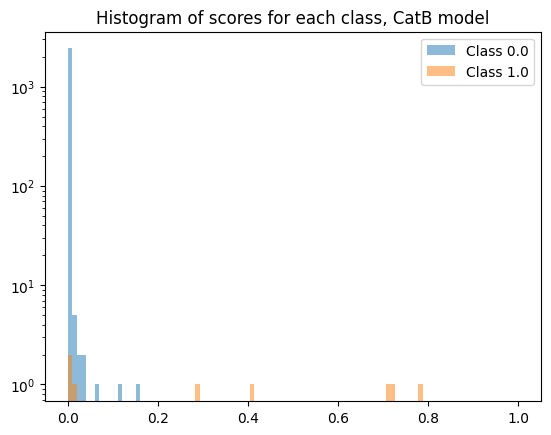

In [1]:
#lib imports
import numpy as np
import matplotlib.pyplot as plt
from adbench.baseline.Supervised import supervised
from sklearn.model_selection import train_test_split

def print_statistics(score, y):
    #find unique values of y
    y_labels, y_counts = np.unique(y, return_counts=True)
    for i, label in enumerate(y_labels):
        print('Class {} has {} samples'.format(label, y_counts[i]))
        print(f'mean = {score[y==label].mean()}, std = {score[y==label].std()}, min = {score[y==label].min()}, max = {score[y==label].max()}')

def plot_histograms(score, y):
    #find unique values of y
    y_labels, y_counts = np.unique(y, return_counts=True)
    fig, ax = plt.subplots()
    for i, label in enumerate(y_labels):
        ax.hist(score[y==label], bins=np.linspace(0,1,100), alpha=0.5, label='Class {}'.format(label), log=True)          
    return fig, ax
    
def test_supervised(X_train, X_test, y_train, y_test, model_name='XGB', plot=False):
    fig = None
    ax = None

    model = supervised(seed=42, model_name=model_name)  # initialization
    model.fit(X_train, y_train)
    score = model.predict_score(X_test)
    print_statistics(score, y_test)
    if plot==True:
        fig, ax = plot_histograms(score, y_test)
        ax.legend()
        ax.set_title(f'Histogram of scores for each class, {model_name} model');
        plt.show()
    return model, fig, ax

#open data file 
X_y = np.load('./data/skewed_MNIST.npy', allow_pickle=True)
X = X_y[:,:-1]
y = X_y[:,-1]
y_labels, y_counts = np.unique(y, return_counts=True)
print(y_labels)
print(y_counts)

#sort y_labels and y_counts by y_counts 
y_labels = y_labels[np.argsort(y_counts)]
y_counts = y_counts[np.argsort(y_counts)]
print(y_labels)
print(y_counts)

#generate labels for anomaly detection - the two lowest count labels are anomalies
y_anom = np.copy(y)
idx = []
for i,_ in enumerate(np.unique(y)):
    idx.append(np.where(y == y_labels[i])[0])
    #if i < 2 then label as 1, else label as 0
    y_anom[idx[i]] = 1 if i < 2 else 0

X_train, X_test, y_train, y_test = train_test_split(X, y_anom, test_size=0.2, random_state=42)
print(np.unique(y_train, return_counts=True))



model_list = ['NB', 'SVM', 'MLP', 'RF', 'LGB', 'XGB', 'CatB']
models= []

for model_name in model_list:
    models.append(test_supervised(X_train, X_test, y_train, y_test, model_name=model_name, plot=True))



